# Titanic

This example uses the 'titanic' dataset to predict the survival of passengers on the Titanic. You can download the Jupyter Notebook of the study <a href="titanic.ipynb">here</a>.

## Initialization

This example uses the following version of VerticaPy:

In [1]:
import verticapy as vp
vp.__version__

'0.9.0'

Connect to Vertica. This example uses an existing connection called "VerticaDSN." For details on how to create a connection, use see the <a href="../../connection.php">connection tutorial</a>.

In [2]:
vp.connect("VerticaDSN")

Use the following command to allow Matplotlib to display graphics.

In [3]:
%matplotlib inline

Let's load the dataset.

,123pclassInt,123survivedInt,AbcVarchar(164),AbcsexVarchar(20),"123ageNumeric(6,3)",123sibspInt,123parchInt,AbcticketVarchar(36),"123fareNumeric(10,5)",AbccabinVarchar(30),AbcembarkedVarchar(20),AbcboatVarchar(100),123bodyInt,Abchome.destVarchar(100)
1,1,0,,female,2.0,1,2,113781,151.55,C22 C26,S,[null],[null],"Montreal, PQ / Chesterville, ON"
2,1,0,,male,30.0,1,2,113781,151.55,C22 C26,S,[null],135,"Montreal, PQ / Chesterville, ON"
3,1,0,,female,25.0,1,2,113781,151.55,C22 C26,S,[null],[null],"Montreal, PQ / Chesterville, ON"
4,1,0,,male,39.0,0,0,112050,0.0,A36,S,[null],[null],"Belfast, NI"
5,1,0,,male,71.0,0,0,PC 17609,49.5042,[null],C,[null],22,"Montevideo, Uruguay"
6,1,0,,male,47.0,1,0,PC 17757,227.525,C62 C64,C,[null],124,"New York, NY"
7,1,0,,male,[null],0,0,PC 17318,25.925,[null],S,[null],[null],"New York, NY"
8,1,0,,male,24.0,0,1,PC 17558,247.5208,B58 B60,C,[null],[null],"Montreal, PQ"
9,1,0,,male,36.0,0,0,13050,75.2417,C6,C,A,[null],"Winnipeg, MN"
10,1,0,,male,25.0,0,0,13905,26.0,[null],C,[null],148,"San Francisco, CA"

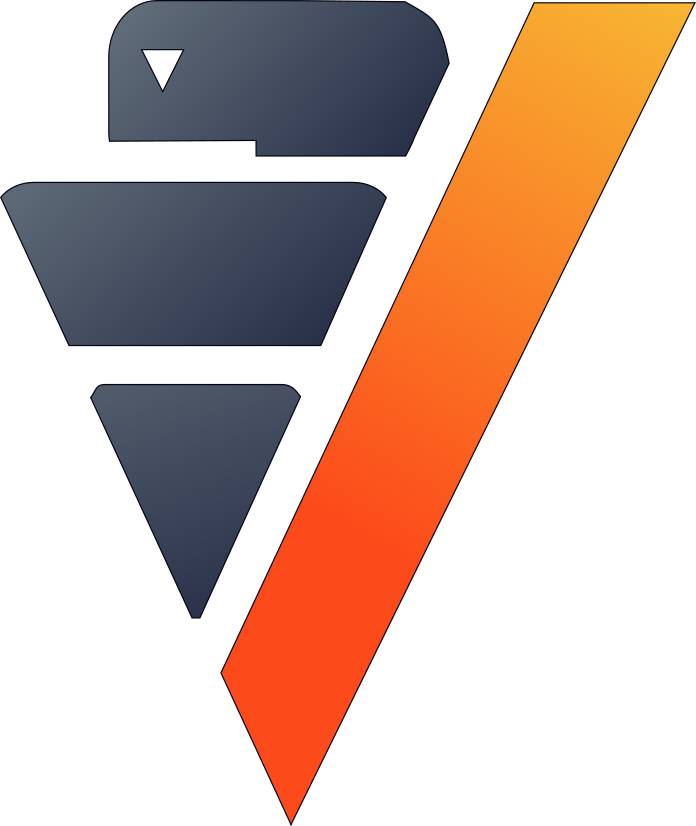

In [4]:
from verticapy.datasets import load_titanic
titanic = load_titanic()
display(titanic)

## Data Exploration and Preparation

Let's explore the data by displaying descriptive statistics of all the columns.

,dtype,count,top,top_percent,unique
"""pclass""",int,1234,3,53.728,3.0
"""survived""",int,1234,0,63.533,2.0
"""name""",varchar(164),1234,"Kelly, Mr. James",0.162,1232.0
"""sex""",varchar(20),1234,male,65.964,2.0
"""age""","numeric(6,3)",997,[null],19.206,96.0
"""sibsp""",int,1234,0,67.747,7.0
"""parch""",int,1234,0,76.904,8.0
"""ticket""",varchar(36),1234,CA. 2343,0.81,887.0
"""fare""","numeric(10,5)",1233,8.05,4.7,277.0
"""cabin""",varchar(30),286,[null],76.823,182.0

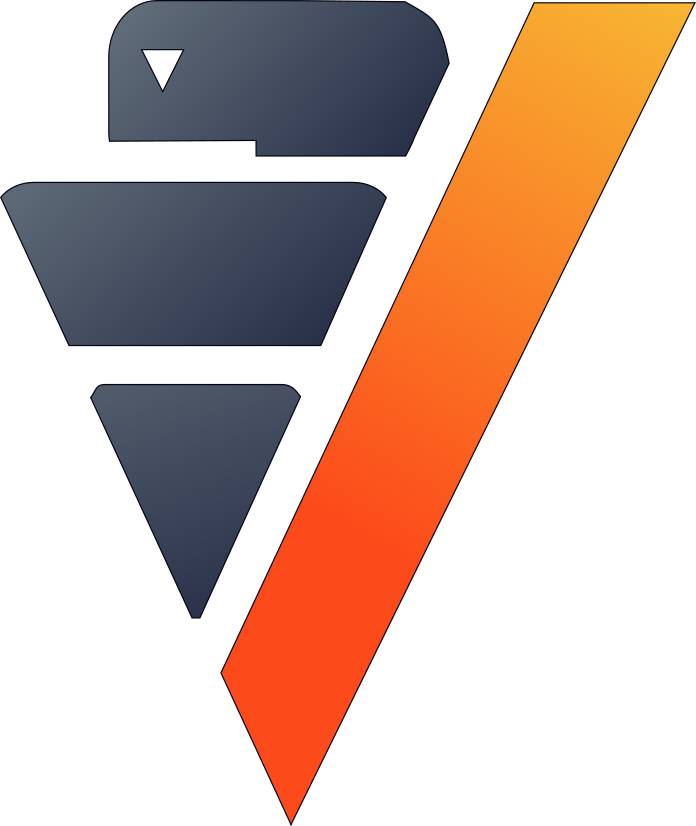

In [5]:
titanic.describe(method = "categorical", unique = True)

The columns "body" (passenger ID), "home.dest" (passenger origin/destination), "embarked" (origin port) and "ticket" (ticket ID) shouldn't influence survival, so we can ignore these.

Let's focus our analysis on the columns "name" and "cabin." We'll begin with the passengers' names.

,AbctokenVarchar(128),"123dfNumeric(36,18)",123cntInteger,123rnkInteger
1,mr,0.14816310052482842,734,1
2,miss,0.046023415421881306,228,2
3,mrs,0.03734356075898264,185,3
4,william,0.016148566814695196,80,4
5,john,0.013726281792490917,68,5
6,master,0.011303996770286637,56,6
7,henry,0.008881711748082359,44,7
8,james,0.007468712151796528,37,8
9,charles,0.007468712151796528,37,8
10,thomas,0.006863140896245458,34,10

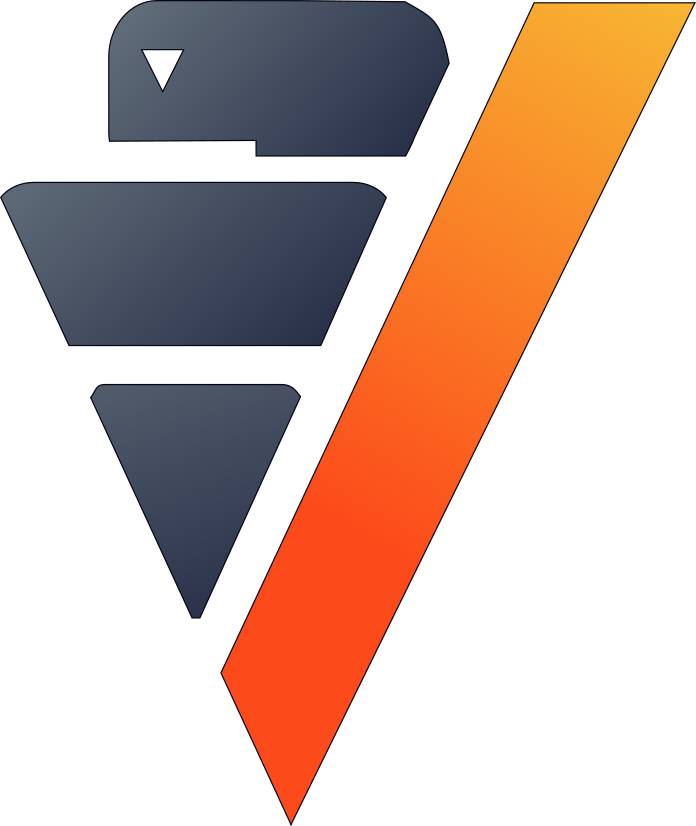

In [6]:
from verticapy.learn.preprocessing import CountVectorizer
model = CountVectorizer("name_voc")
model.fit(titanic, ["Name"]).transform()

Passengers' titles might come in handy. We can extract these from their names.

Let's move on to the cabins.

,AbctokenVarchar(128),"123dfNumeric(36,18)",123cntInteger,123rnkInteger
1,[null],0.7337461300309598,948,1
2,f,0.006191950464396285,8,2
3,c27,0.004643962848297214,6,3
4,c25,0.004643962848297214,6,3
5,c23,0.004643962848297214,6,3
6,g6,0.003869969040247678,5,6
7,f4,0.003095975232198142,4,7
8,d,0.003095975232198142,4,7
9,c78,0.003095975232198142,4,7
10,c26,0.003095975232198142,4,7

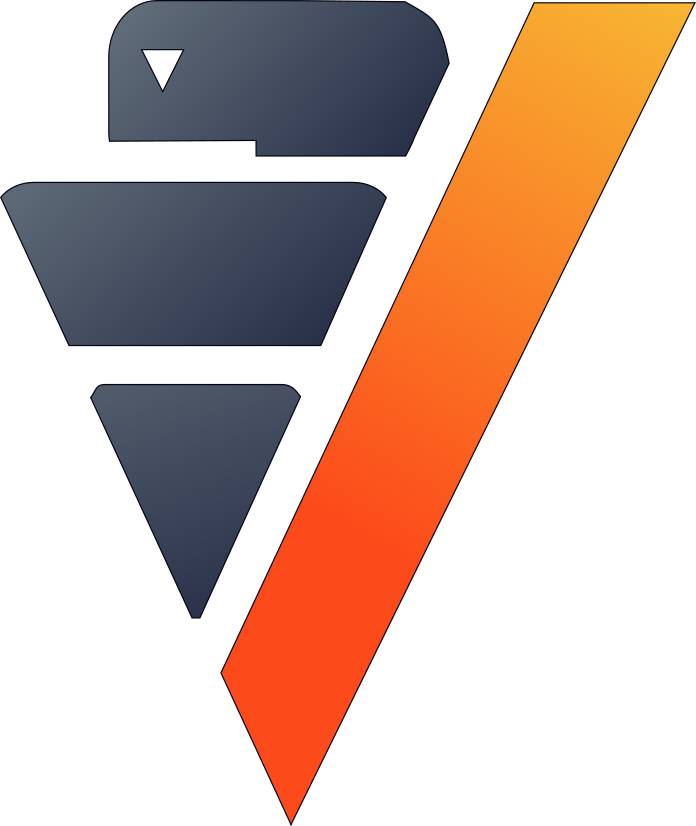

In [7]:
model = CountVectorizer("cabin_voc")
model.fit("titanic", ["cabin"]).transform()

Here, we have the cabin IDs, the letter of which represents a certain position on the boat. Let's see how often each cabin occurs in the dataset.

,AbctokenVarchar(4),123SUMInteger
1,[null],948
2,a,20
3,b,92
4,c,113
5,d,47
6,e,43
7,f,19
8,g,9
9,t,1

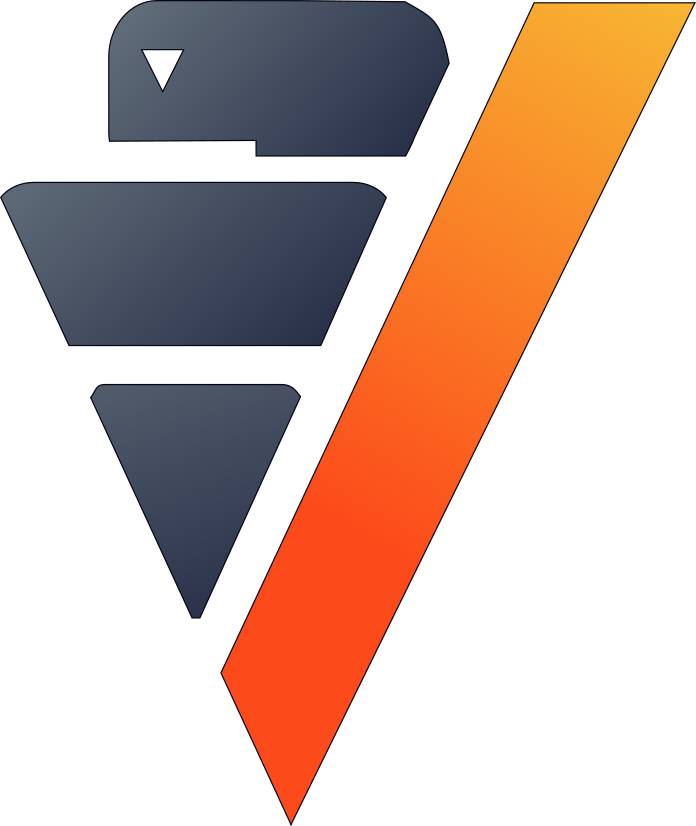

In [8]:
CountVectorizer("cabin_voc").fit("titanic", ["cabin"]).transform(
                )["token"].str_slice(1, 1).groupby(
                columns = ["token"], expr = ["SUM(cnt)"]).head(30)

While NULL values for "boat" clearly represent passengers who have a dedicated "lifeboat," we can't be so sure about NULL values for "cabin". We can guess that these might represent passengers without a cabin. If this is the case, then these are missing values not at random (MNAR).

We'll revisit this problem later. For now, let's drop the columns that don't affect survival and then encode the rest.

,123pclassInt,123survivedInt,AbcVarchar(164),AbcsexVarchar(20),"123ageNumeric(6,3)",123sibspInt,123parchInt,"123fareNumeric(10,5)",AbccabinVarchar(30),AbcboatVarchar(100)
1,1,0,,female,2.0,1,2,151.55,C22 C26,[null]
2,1,0,,male,30.0,1,2,151.55,C22 C26,[null]
3,1,0,,female,25.0,1,2,151.55,C22 C26,[null]
4,1,0,,male,39.0,0,0,0.0,A36,[null]
5,1,0,,male,71.0,0,0,49.5042,[null],[null]
6,1,0,,male,47.0,1,0,227.525,C62 C64,[null]
7,1,0,,male,[null],0,0,25.925,[null],[null]
8,1,0,,male,24.0,0,1,247.5208,B58 B60,[null]
9,1,0,,male,36.0,0,0,75.2417,C6,A
10,1,0,,male,25.0,0,0,26.0,[null],[null]

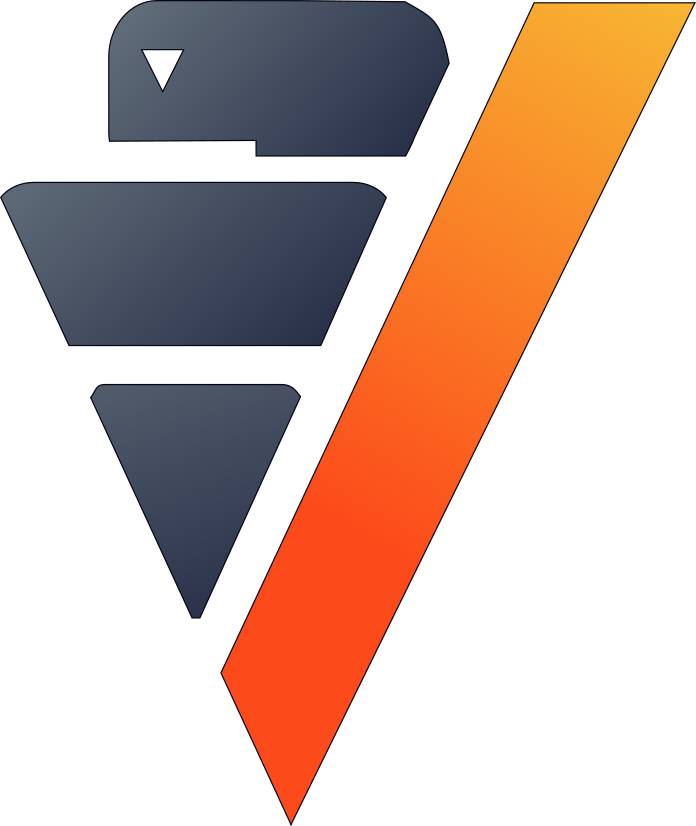

In [9]:
titanic.drop(["body", "home.dest", "embarked", "ticket"])

795 elements were filled.
948 elements were filled.


,123pclassInt,123survivedInt,AbcnameVarchar(164),AbcsexVarchar(20),"123ageNumeric(6,3)",123sibspInt,123parchInt,"123fareNumeric(10,5)",AbccabinVarchar(4),123boatBool
1,1,0,Miss.,female,2.0,1,2,151.55,C,0
2,1,0,Mr.,male,30.0,1,2,151.55,C,0
3,1,0,Mrs.,female,25.0,1,2,151.55,C,0
4,1,0,Mr.,male,39.0,0,0,0.0,A,0
5,1,0,Mr.,male,71.0,0,0,49.5042,No Cabin,0
6,1,0,Col.,male,47.0,1,0,227.525,C,0
7,1,0,Mr.,male,[null],0,0,25.925,No Cabin,0
8,1,0,Mr.,male,24.0,0,1,247.5208,B,0
9,1,0,Mr.,male,36.0,0,0,75.2417,C,1
10,1,0,Mr.,male,25.0,0,0,26.0,No Cabin,0

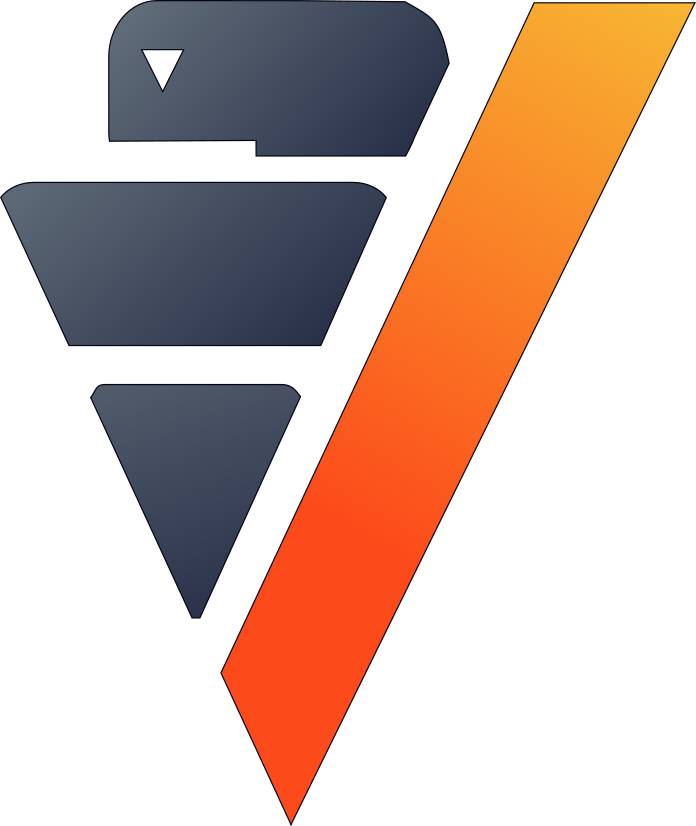

In [10]:
titanic["cabin"].str_slice(1, 1)["name"].str_extract(
        ' ([A-Za-z]+)\.')["boat"].fillna(
        method = "0ifnull")["cabin"].fillna("No Cabin")

Looking at our data now, we can see that some first class passengers have a NULL value for their cabin, so we can safely say that our assumption about the meaning of a NULL value of "cabin" turned out to be incorrect. This means that the "cabin" column has far too many missing values at random (MAR). We'll have to drop it.

,123pclassInt,123survivedInt,AbcnameVarchar(164),AbcsexVarchar(20),"123ageNumeric(6,3)",123sibspInt,123parchInt,"123fareNumeric(10,5)",123boatBool
1,1,0,Miss.,female,2.0,1,2,151.55,0
2,1,0,Mr.,male,30.0,1,2,151.55,0
3,1,0,Mrs.,female,25.0,1,2,151.55,0
4,1,0,Mr.,male,39.0,0,0,0.0,0
5,1,0,Mr.,male,71.0,0,0,49.5042,0
6,1,0,Col.,male,47.0,1,0,227.525,0
7,1,0,Mr.,male,[null],0,0,25.925,0
8,1,0,Mr.,male,24.0,0,1,247.5208,0
9,1,0,Mr.,male,36.0,0,0,75.2417,1
10,1,0,Mr.,male,25.0,0,0,26.0,0

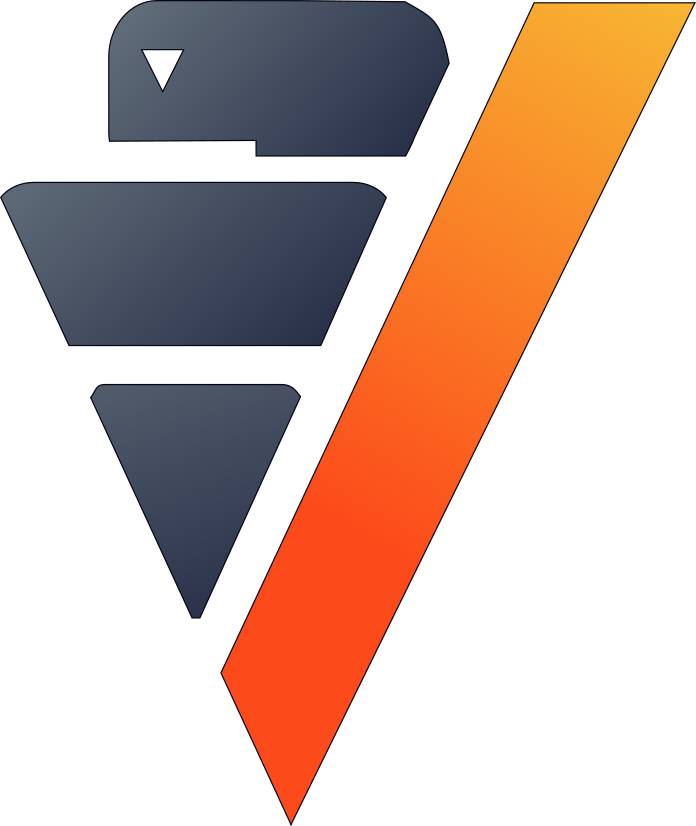

In [11]:
titanic["cabin"].drop()

Let's look at descriptive statistics of the entire Virtual Dataframe.

,"123""pclass""Int100%","123""survived""Int100%","123""age""Numeric(6,3)80%","123""sibsp""Int100%","123""parch""Int100%","123""fare""Numeric(10,5)99%","123""boat""Bool100%","Abc""name""Varchar(164)100%","Abc""sex""Varchar(20)100%"
dtype,int,int,"numeric(6,3)",int,int,"numeric(10,5)",bool,varchar(164),varchar(20)
percent,100.0,100.0,80.794,100.0,100.0,99.919,100.0,100.0,100.0
count,1234,1234,997,1234,1234,1233,1234.0,1234,1234
top,3,0,[null],0,0,8.05,0,Mr.,male
top_percent,53.728,63.533,19.206,67.747,76.904,4.7,64.425,59.481,65.964
avg,2.28444084278768,0.364667747163695,30.1524573721163,0.504051863857374,0.378444084278768,33.9637936739659,0.355753646677472,4.73176661264181,4.6807131280389
stddev,0.842485636190292,0.481532018641288,14.4353046299159,1.04111727241629,0.868604707790392,52.6460729831293,0.478935143777661,1.08376455904966,0.948042321667023
min,1,0,0.33,0,0,0.0,0,4,4
approx_25%,1.0,0.0,21.0,0.0,0.0,7.8958,0.0,4,4
approx_50%,3.0,0.0,28.0,0.0,0.0,14.4542,0.0,4,4

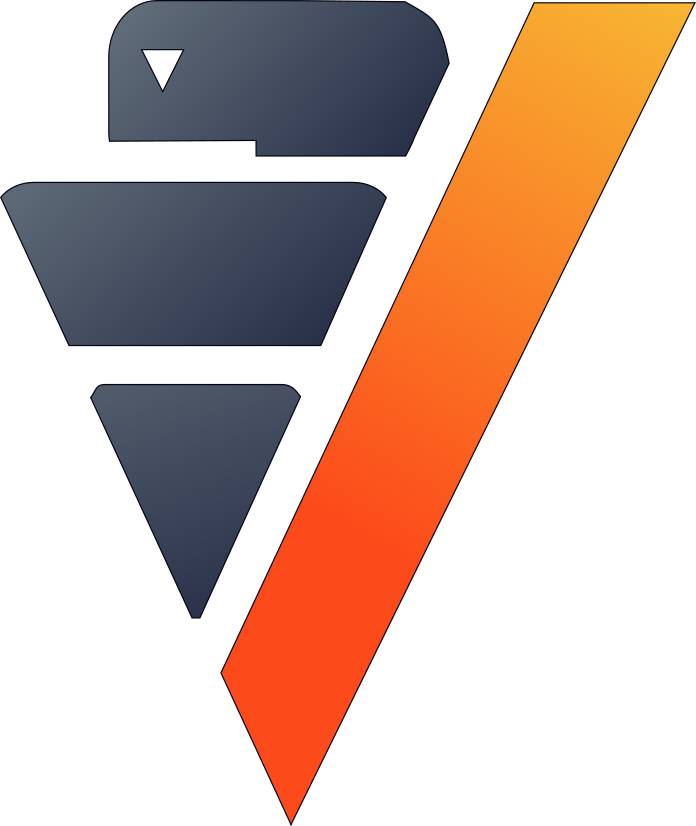

In [12]:
titanic.describe(method = "all")

Descriptive statistics can give us valuable insights into our data. Notice, for example, that the column "fare" has many outliers (The maximum of 512.33 is much greater than the 9th decile of 79.13). Most passengers traveled in 3rd class (median of pclass = 3).

The "sibsp" column represents the number of siblings for each passenger, while the "parch" column represents the number of parents and children. We can use these to create a new feature: "family_size".

In [13]:
titanic["family_size"] = titanic["parch"] + titanic["sibsp"] + 1

Let's move on to outliers. We have several tools for locating outliers (LocalOutlier Factor, DBSCAN, k-means...), but we'll just use winsorization in this example. Again, "fare" has many outliers, so we'll start there.

,123pclassInt,123survivedInt,AbcnameVarchar(164),AbcsexVarchar(20),"123ageNumeric(6,3)",123sibspInt,123parchInt,"123fareNumeric(18,13)",123boatBool,123family_sizeInteger
1,1,0,Miss.,female,2.0,1,2,151.55,0,4
2,1,0,Mr.,male,30.0,1,2,151.55,0,4
3,1,0,Mrs.,female,25.0,1,2,151.55,0,4
4,1,0,Mr.,male,39.0,0,0,0.0,0,1
5,1,0,Mr.,male,71.0,0,0,49.5042,0,1
6,1,0,Col.,male,47.0,1,0,227.525,0,2
7,1,0,Mr.,male,[null],0,0,25.925,0,1
8,1,0,Mr.,male,24.0,0,1,244.5480856064831,0,2
9,1,0,Mr.,male,36.0,0,0,75.2417,1,1
10,1,0,Mr.,male,25.0,0,0,26.0,0,1

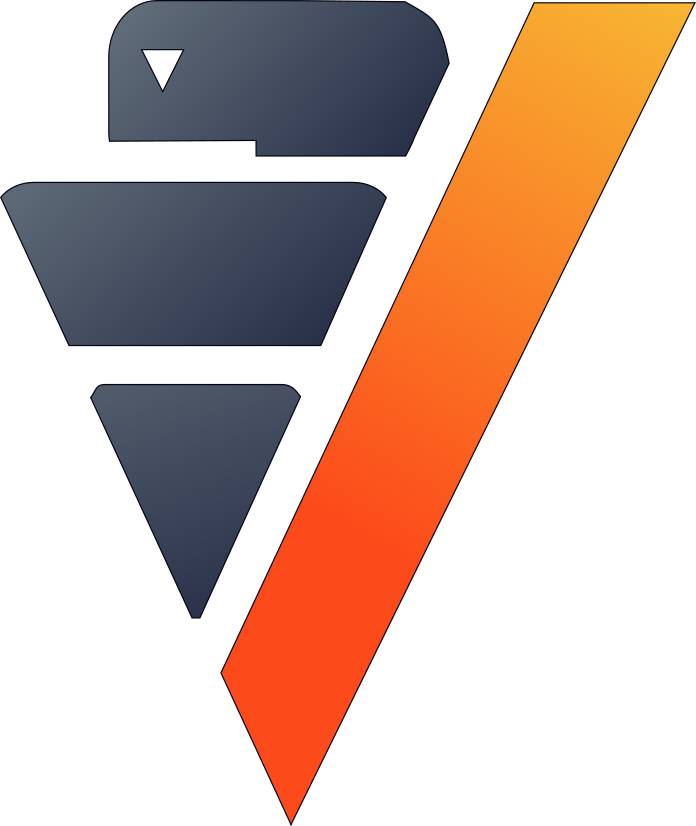

In [14]:
titanic["fare"].fill_outliers(method = "winsorize", 
                              alpha = 0.03)

Let's encode the column "sex" so we can use it with numerical methods. 

,123pclassInt,123survivedInt,AbcnameVarchar(164),123sexInt,"123ageNumeric(6,3)",123sibspInt,123parchInt,"123fareNumeric(18,13)",123boatBool,123family_sizeInteger
1,1,0,Miss.,0,2.0,1,2,151.55,0,4
2,1,0,Mr.,1,30.0,1,2,151.55,0,4
3,1,0,Mrs.,0,25.0,1,2,151.55,0,4
4,1,0,Mr.,1,39.0,0,0,0.0,0,1
5,1,0,Mr.,1,71.0,0,0,49.5042,0,1
6,1,0,Col.,1,47.0,1,0,227.525,0,2
7,1,0,Mr.,1,[null],0,0,25.925,0,1
8,1,0,Mr.,1,24.0,0,1,244.5480856064831,0,2
9,1,0,Mr.,1,36.0,0,0,75.2417,1,1
10,1,0,Mr.,1,25.0,0,0,26.0,0,1

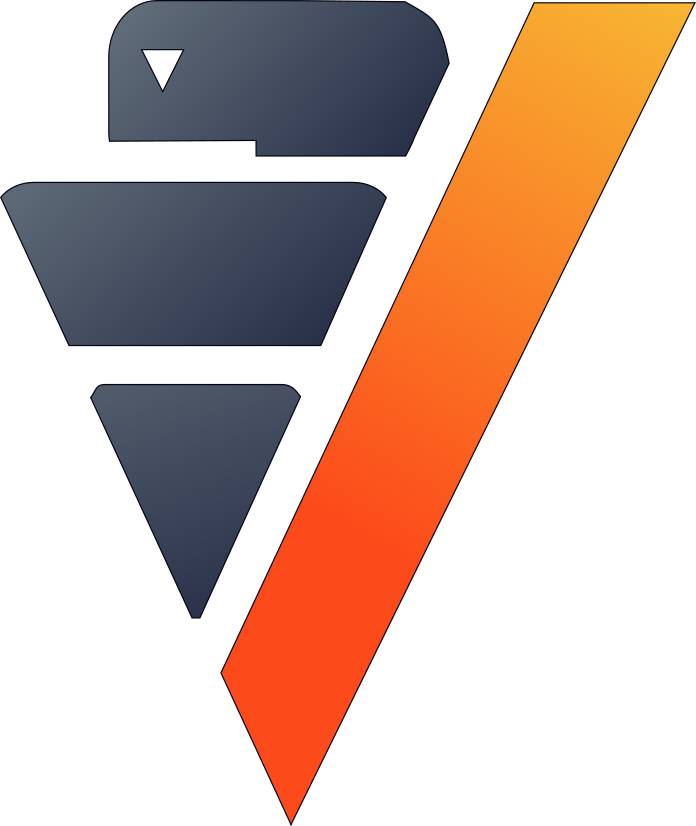

In [15]:
titanic["sex"].label_encode()

The column "age" has too many missing values and since most machine learning algorithms can't handle missing values, we need to impute our data. Let's fill the missing values using the average "age" of the passengers that have the same "pclass" and "sex".

237 elements were filled.


,123pclassInt,123survivedInt,AbcnameVarchar(164),123sexInt,123ageFloat,123sibspInt,123parchInt,"123fareNumeric(18,13)",123boatBool,123family_sizeInteger
1,1,1,Miss.,0,36.0,0,0,135.6333,1,1
2,1,1,Miss.,0,31.0,0,0,134.5,1,1
3,1,1,Miss.,0,21.0,0,0,26.55,1,1
4,1,1,Mrs.,0,50.0,1,1,211.5,1,3
5,1,1,Mrs.,0,45.0,1,1,164.8667,1,3
6,1,1,Miss.,0,31.0,0,2,164.8667,1,3
7,1,1,Mrs.,0,55.0,0,0,135.6333,1,1
8,1,1,Mrs.,0,60.0,1,0,75.25,1,2
9,1,1,Miss.,0,35.0,0,0,244.5480856064831,1,1
10,1,1,Mrs.,0,37.2635658914729,0,0,79.2,1,1

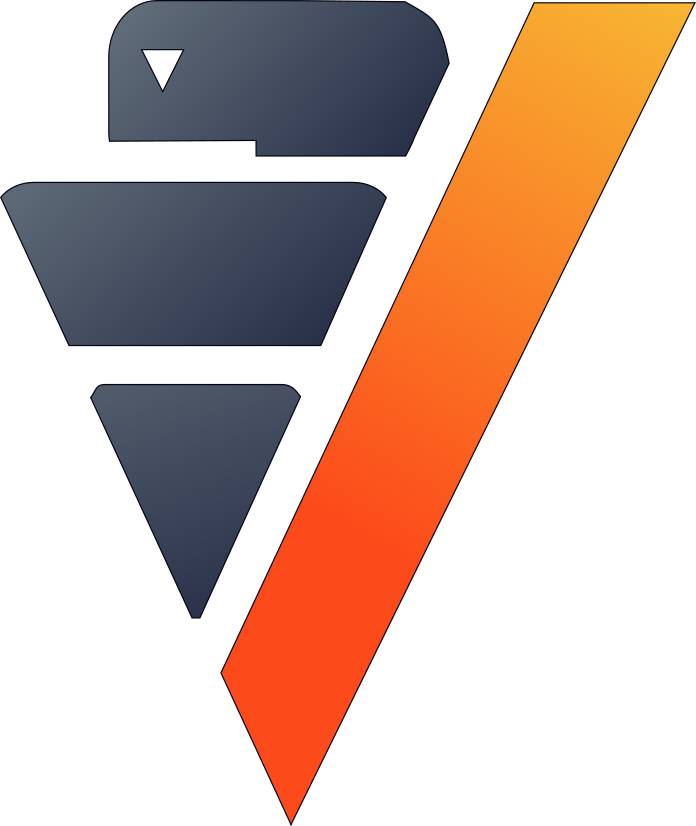

In [16]:
titanic["age"].fillna(method = "mean", by = ["pclass", "sex"])

Let's draw the correlation matrix to see the links between variables.

,"""pclass""","""survived""","""sex""","""age""","""sibsp""","""parch""","""fare""","""boat""","""family_size"""
"""pclass""",1.0,-0.335634606444129,0.150967389146603,-0.447455588651876,-0.0691851178284916,-0.0429882472107741,-0.722423468046863,-0.344146454498079,-0.109035609183308
"""survived""",-0.335634606444129,1.0,-0.528849820180154,-0.00336824465604963,0.0934303518392484,0.171691455579124,0.322278285934243,0.949194918072845,0.185599315104602
"""sex""",0.150967389146603,-0.528849820180154,1.0,0.0659428426025525,-0.184712709381236,-0.246951353519755,-0.264115871968389,-0.484361066873315,-0.284892754418329
"""age""",-0.447455588651876,-0.00336824465604963,0.0659428426025525,1.0,-0.116480956583223,-0.174615632035404,0.228529791943121,0.00421157947473071,-0.133316437156597
"""sibsp""",-0.0691851178284916,0.0934303518392484,-0.184712709381236,-0.116480956583223,1.0,0.436524985907755,0.444010325371998,0.100652268255772,0.854550816071704
"""parch""",-0.0429882472107741,0.171691455579124,-0.246951353519755,-0.174615632035404,0.436524985907755,1.0,0.402198981036797,0.175393711669708,0.776055413048162
"""fare""",-0.722423468046863,0.322278285934243,-0.264115871968389,0.228529791943121,0.444010325371998,0.402198981036797,1.0,0.334910192561693,0.52665819103252
"""boat""",-0.344146454498079,0.949194918072845,-0.484361066873315,0.00421157947473071,0.100652268255772,0.175393711669708,0.334910192561693,1.0,0.190320484343677
"""family_size""",-0.109035609183308,0.185599315104602,-0.284892754418329,-0.133316437156597,0.854550816071704,0.776055413048162,0.52665819103252,0.190320484343677,1.0

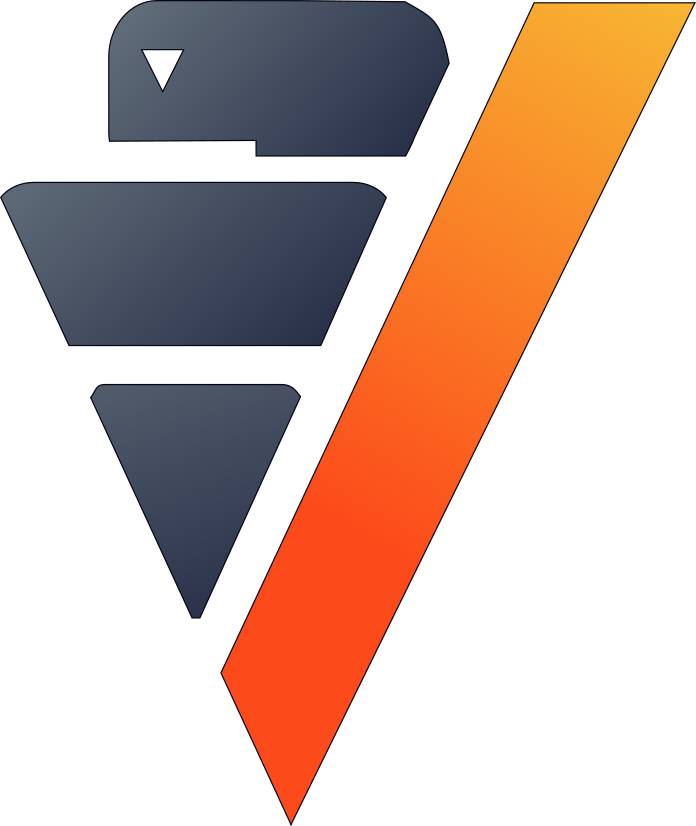

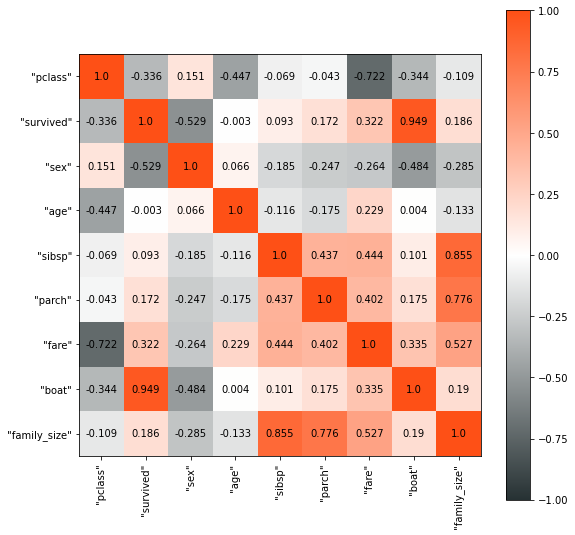

In [17]:
titanic.corr(method = "spearman")

Fare correlates strongly with family size. This is about what you would expect: a larger family means more tickets, and more tickets means a greater fare.

Survival correlates strongly with whether or not a passenger has a lifeboat (the "boat" variable). Still, to increase the generality of our model, we should avoid predictions based on just one variable. Let's split the study into two use cases:

<ul>
    <li>Passengers with a lifeboat</li>
    <li>Passengers without a lifeboat</li>
</ul>

Before we move on: we did a lot of work to clean up this data, but we haven't saved anything to our Vertica database! Let's look at the modifications we've made to the vDataFrame.

In [18]:
print(titanic.current_relation())

(
   SELECT
     "pclass",
     "survived",
     "name",
     "sex",
     COALESCE("age", AVG("age") OVER (PARTITION BY "pclass", "sex")) AS "age",
     "sibsp",
     "parch",
     "fare",
     "boat",
     "family_size" 
   FROM
 (
   SELECT
     "pclass",
     "survived",
     REGEXP_SUBSTR("name", ' ([A-Za-z]+)\.') AS "name",
     DECODE("sex", 'female', 0, 'male', 1, 2) AS "sex",
     "age",
     "sibsp",
     "parch",
     (CASE WHEN "fare" < -176.6204982585513 THEN -176.6204982585513 WHEN "fare" > 244.5480856064831 THEN 244.5480856064831 ELSE "fare" END) AS "fare",
     DECODE("boat", NULL, 0, 1) AS "boat",
     (("parch") + ("sibsp")) + (1) AS "family_size" 
   FROM
 (
   SELECT
     "pclass",
     "survived",
     "name",
     "sex",
     "age",
     "sibsp",
     "parch",
     "fare",
     "boat" 
   FROM
 "public"."titanic") 
VERTICAPY_SUBTABLE) 
VERTICAPY_SUBTABLE) 
VERTICAPY_SUBTABLE


Let see what's happening when we aggregate and turn on SQL generation.

,avg
"""pclass""",2.28444084278768
"""survived""",0.364667747163695
"""sex""",0.659643435980551
"""age""",29.717623352014
"""sibsp""",0.504051863857374
"""parch""",0.378444084278768
"""fare""",32.9113074018842
"""boat""",0.355753646677472
"""family_size""",1.88249594813614

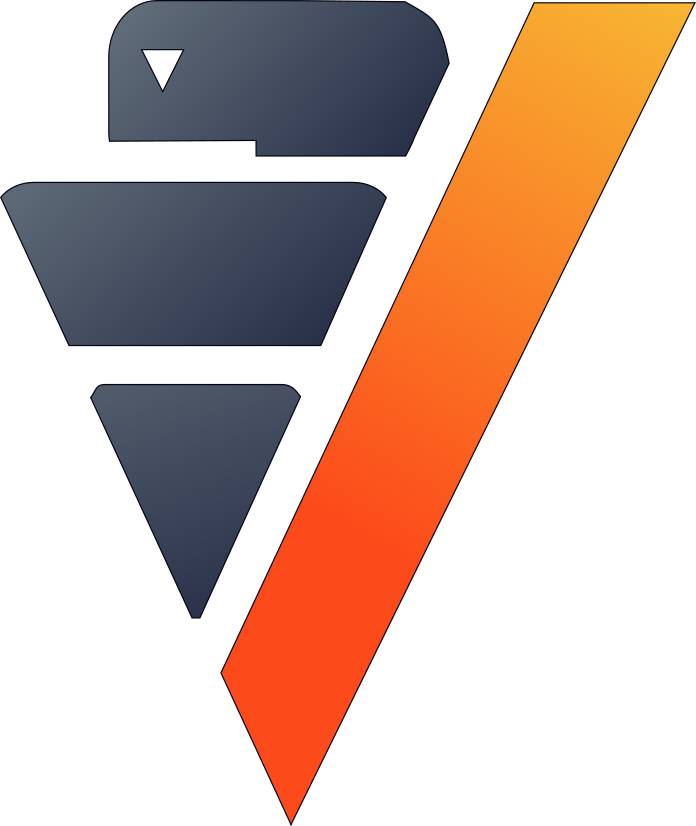

In [19]:
vp.set_option("sql_on", True)
titanic.avg()

VerticaPy dynamically generates SQL code whenever you make modifications to your data. To avoid recomputation, it also stores previous aggregations. If we filter anything in our data, it will update the catalog with our modifications.

In [20]:
vp.set_option("sql_on", False)
print(titanic.info())

The vDataFrame was modified many times: 
 * {Tue May  3 10:20:59 2022} [Drop]: vColumn "body" was deleted from the vDataFrame.
 * {Tue May  3 10:20:59 2022} [Drop]: vColumn "home.dest" was deleted from the vDataFrame.
 * {Tue May  3 10:20:59 2022} [Drop]: vColumn "embarked" was deleted from the vDataFrame.
 * {Tue May  3 10:20:59 2022} [Drop]: vColumn "ticket" was deleted from the vDataFrame.
 * {Tue May  3 10:21:01 2022} [Apply]: The vColumn 'cabin' was transformed with the func 'x -> SUBSTR(x, 1, 1)'.
 * {Tue May  3 10:21:01 2022} [Apply]: The vColumn 'name' was transformed with the func 'x -> REGEXP_SUBSTR(x, ' ([A-Za-z]+)\.')'.
 * {Tue May  3 10:21:01 2022} [Fillna]: 795 "boat" missing values were  filled.
 * {Tue May  3 10:21:02 2022} [Fillna]: 948 "cabin" missing values were  filled.
 * {Tue May  3 10:21:04 2022} [Drop]: vColumn "cabin" was deleted from the vDataFrame.
 * {Tue May  3 10:21:09 2022} [Eval]: A new vColumn "family_size" was added to the vDataFrame.
 * {Tue May  3 10

Let's move on to modeling our data. Save the vDataframe to your Vertica database.

In [37]:
from verticapy import drop
drop("titanic_boat", method = "view")
titanic_boat = titanic.search(titanic["boat"] == 1).to_db("titanic_boat", relation_type = "view")
drop("titanic_no_boat", method = "view")
titanic_no_boat = titanic.search(titanic["boat"] == 0).to_db("titanic_no_boat", relation_type = "view")

## Machine Learning

### Passengers with a lifeboat


First, let's look at the number of survivors.

,value
name,"""survived"""
dtype,integer
unique,2.0
count,439.0
1,430
0,9

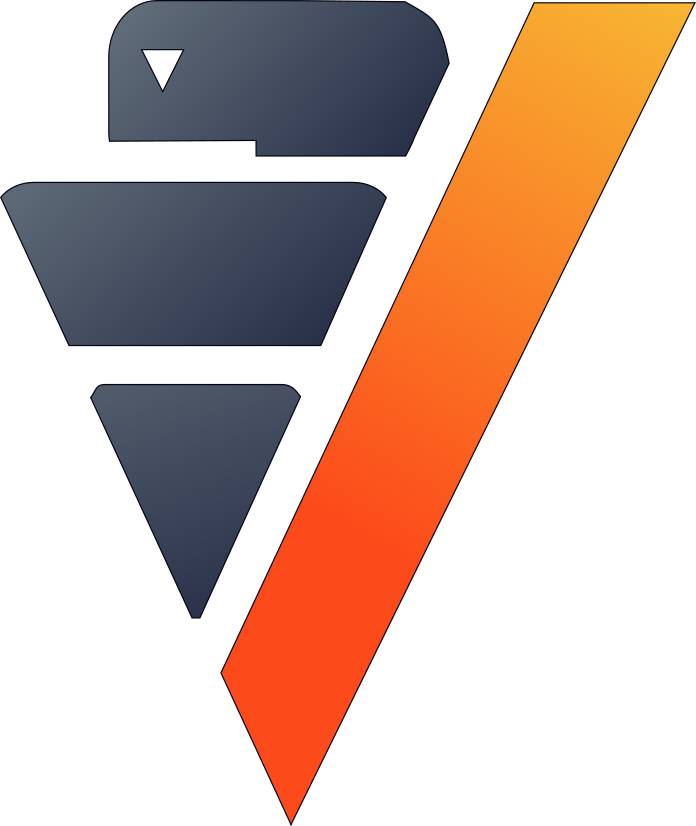

In [24]:
titanic_boat["survived"].describe()

We have nine deaths. Let's try to understand why these passengers died.

,123pclassInteger,123survivedInteger,AbcnameVarchar(164),123sexInteger,123ageFloat,123sibspInteger,123parchInteger,"123fareNumeric(18,13)",123boatInteger,123family_sizeInteger
1,1,0,Mr.,1,40.9822068965517,0,0,30.6958,1,1
2,1,0,Mr.,1,36.0,0,0,75.2417,1,1
3,2,0,Mr.,1,34.0,1,0,21.0,1,2
4,3,0,Mrs.,0,30.0,1,0,15.55,1,2
5,3,0,Mr.,1,27.0,1,0,14.4542,1,2
6,3,0,Mr.,1,36.0,1,0,15.55,1,2
7,3,0,Mr.,1,26.2142058823529,0,0,7.25,1,1
8,3,0,Mr.,1,25.0,0,0,7.25,1,1
9,3,0,Mr.,1,32.0,1,0,15.85,1,2

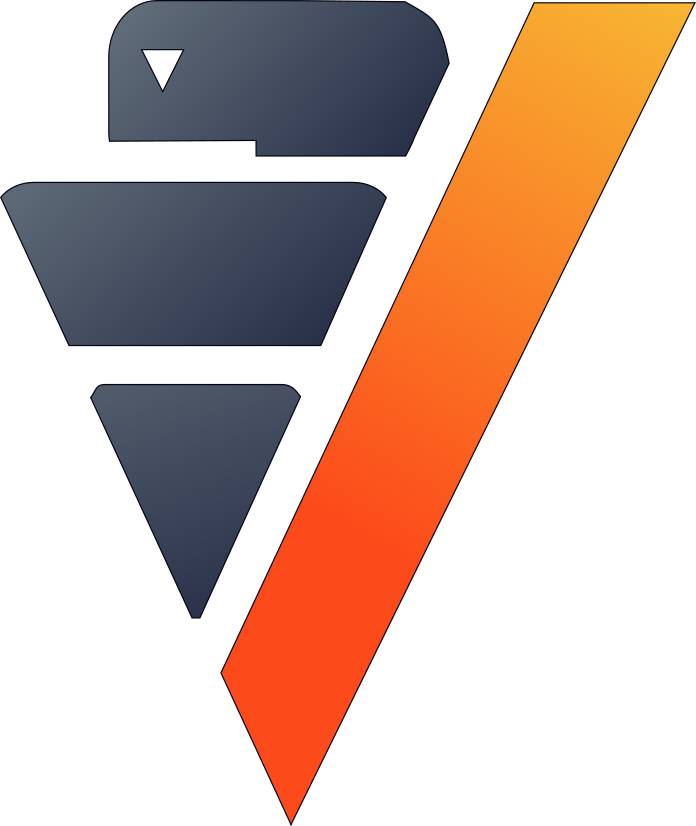

In [40]:
titanic_boat.search(titanic_boat["survived"] == 0).head(10)

Apart from a decent amount of these passengers being third-class passengers, it doesn't seem like there are any clear predictors here for their deaths. Making a model from this would be unhelpful. 

### Passengers without a lifeboat

Let's move on to passengers without a lifeboat. 

,value
name,"""survived"""
dtype,integer
unique,2.0
count,795.0
0,775
1,20

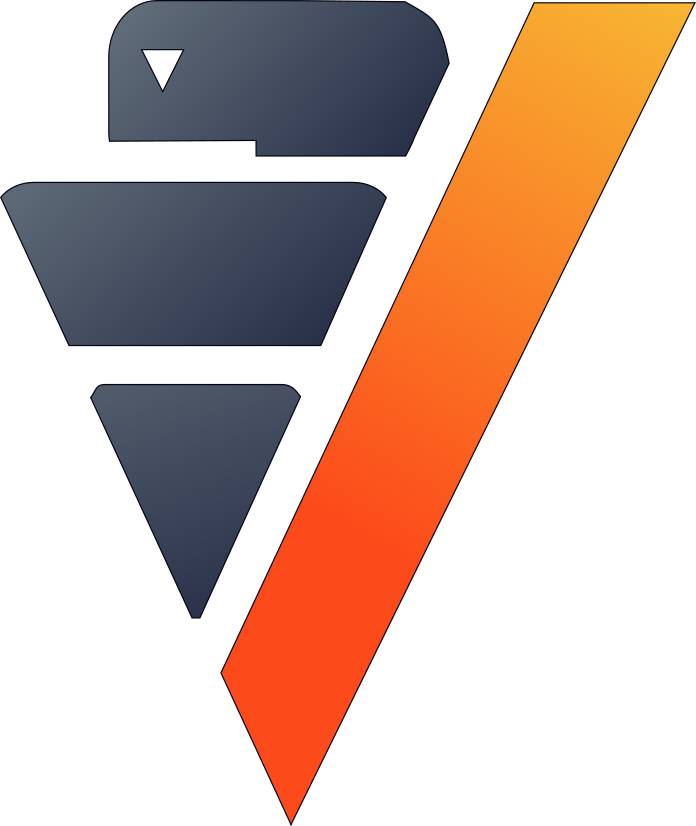

In [38]:
titanic_no_boat["survived"].describe()

Only 20 survived. Let's find out why.

,123pclassInteger,123survivedInteger,AbcnameVarchar(164),123sexInteger,123ageFloat,123sibspInteger,123parchInteger,"123fareNumeric(18,13)",123boatInteger,123family_sizeInteger
1,1,1,Miss.,0,58.0,0,0,146.5208,0,1
2,2,1,Mrs.,0,28.0,0,0,12.65,0,1
3,2,1,Mrs.,0,30.0,3,0,21.0,0,4
4,2,1,Mrs.,0,14.0,1,0,30.0708,0,2
5,2,1,Mrs.,0,42.0,1,0,26.0,0,2
6,2,1,Miss.,0,17.0,0,0,10.5,0,1
7,2,1,Mrs.,0,34.0,0,1,23.0,0,2
8,2,1,Miss.,0,18.0,0,1,23.0,0,2
9,2,1,Mrs.,0,42.0,0,0,13.0,0,1
10,3,1,Mrs.,0,15.0,1,0,14.4542,0,2

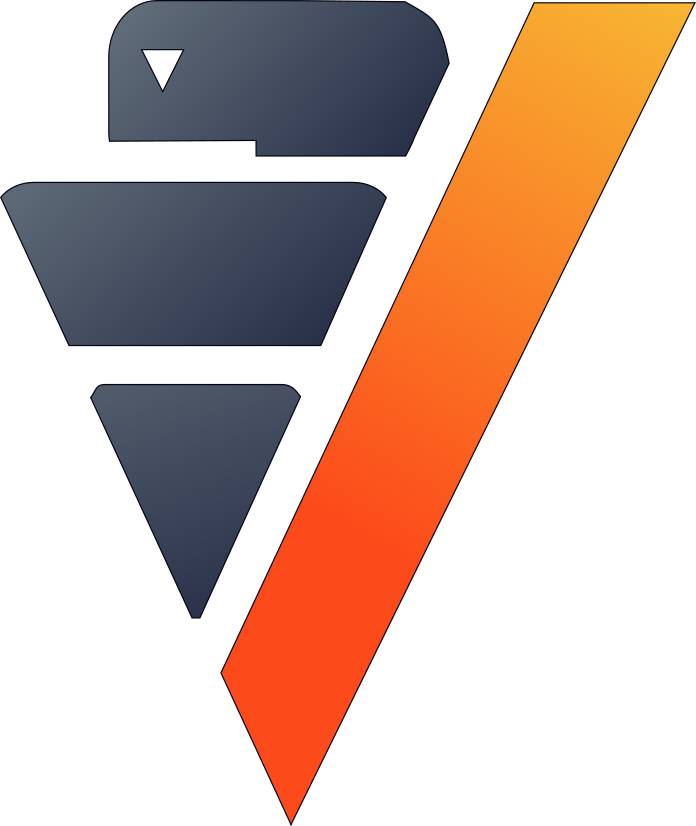

In [39]:
titanic_no_boat.search(titanic_boat["survived"] == 1).head(20)

Most survivors seem to be women. Let's build a model with this in mind.

One of our predictors is categorical: the passenger title. Some of these predictors are corrleated, so it'd be best to work with a non-linear classifier that can handle that. In this case, a random forest classifier seems to be perfect. Let's evaluate it with a cross-validation.

,auc,prc_auc,accuracy,log_loss,precision,recall,f1_score,mcc,informedness,markedness,csi,time
1-fold,0.9533769063180827,0.35730138533283,0.9659090909090909,0.0389919854372209,0,0.0,0,0,0.0,-0.03409090909090906,0.0,0.4354102611541748
2-fold,0.9291251384274639,0.37062390075308016,0.9735849056603774,0.0349201186235419,0,0.0,0,0,0.0,-0.026415094339622636,0.0,0.464846134185791
3-fold,0.9770114942528736,0.22139249639249636,0.9849056603773585,0.0214770027802224,0,0.0,0,0,0.0,-0.015094339622641506,0.0,0.4200739860534668
avg,0.9531711796661401,0.3164392608261355,0.9747998856489423,0.031796368946995064,0.0,0.0,0.0,0.0,0.0,-0.025200114351057734,0.0,0.4401101271311442
std,0.02394384077692897,0.08258200727917958,0.009556387663240679,0.009165806751183139,0.0,0.0,0.0,0.0,0.0,0.009556387663240679,0.0,0.022753084785294538

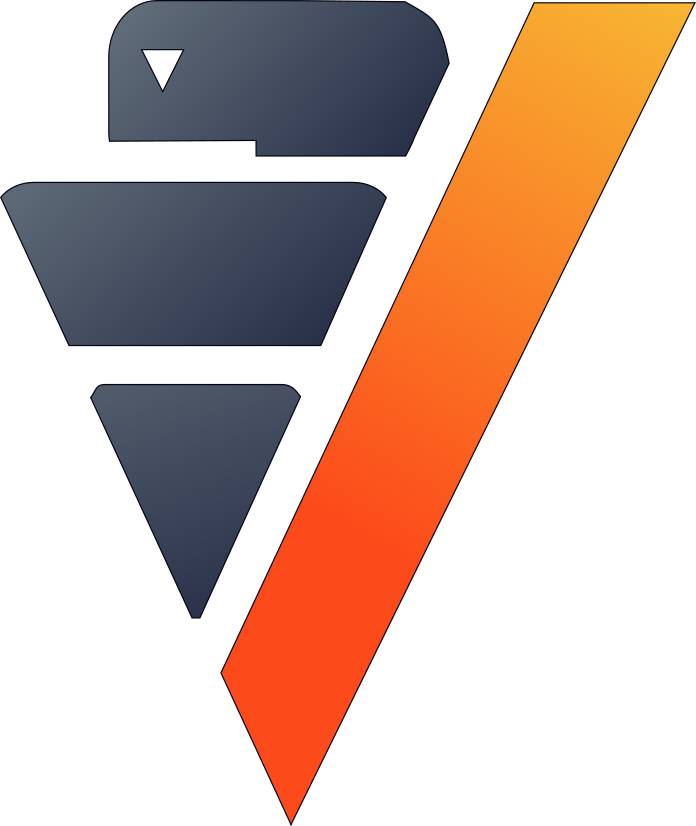

In [41]:
from verticapy.learn.ensemble import RandomForestClassifier
from verticapy.learn.model_selection import cross_validate

predictors = titanic.get_columns(exclude_columns = ['survived'])
response = "survived"
model = RandomForestClassifier("rf_titanic", 
                               n_estimators = 40, 
                               max_depth = 4)
cross_validate(model, titanic_no_boat, predictors, response)

This dataset is pretty unbalanced so we'll use an AUC to evaluate it. Looking at our table, our model has an average AUC of more than 0.9, so our model is quite good.

We can now build a model with the entire dataset.

In [42]:
model.fit(titanic_no_boat, predictors, response)



call_string
SELECT rf_classifier('public.rf_titanic', '"public"."_verticapy_tmp_view_dbadmin_43247_5454950161_"', '"survived"', '"pclass", "name", "sex", "age", "sibsp", "parch", "fare", "boat", "family_size"' USING PARAMETERS exclude_columns='', ntree=40, mtry=4, sampling_size=0.632, max_depth=4, max_breadth=1000000000, min_leaf_size=1, min_info_gain=0, nbins=32);

details
 predictor |      type      
-----------+----------------
  pclass   |      int       
   name    |char or varchar 
    sex    |      int       
    age    |float or numeric
   sibsp   |      int       
   parch   |      int       
   fare    |float or numeric
   boat    |      int       
family_size|      int       


Additional Info
       Name       |Value
------------------+-----
    tree_count    | 40  
rejected_row_count|  1  
accepted_row_count| 794 

Let's look at the importance of each feature.

,importance,sign
name,26.04,1
age,13.79,1
sex,13.64,1
fare,12.89,1
pclass,9.73,1
parch,9.48,1
sibsp,7.47,1
family_size,6.95,1
boat,0.0,0

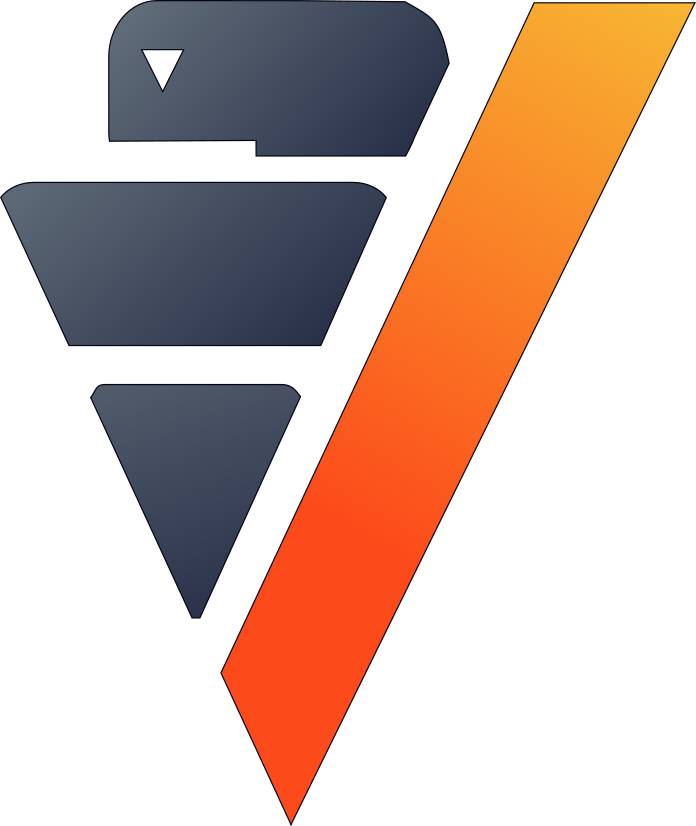

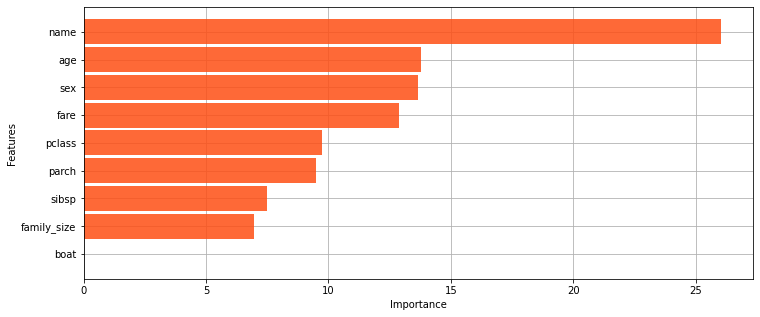

In [43]:
model.features_importance()

As expected, a passenger's title and the sex are the most important predictors of survival.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!